In [1]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.integrate import odeint

root 1: -9.244997998398398, root 2: 3.2449979983983988

x00 = [0.00152, 0.00061, 0.00349, 0.00023, 0.18, 0.003, 0.426, 0.101]
p = 0.5
R_0_1 = 2.9999999999999996
R_0_2 = 8.0
I_eq_theoretical = 0.06666666666666671 (0.06666666666666683)
I_eq_real = 0.06664515803321994
stability_condition of DFE: = False
Stability Condition of EE: True.
susceptible adults at eq patch 1 = 0.02221086660531941
final infected second patch = 0.11079529978053615



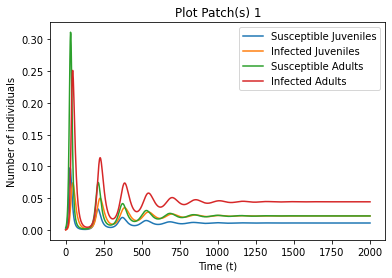

--------


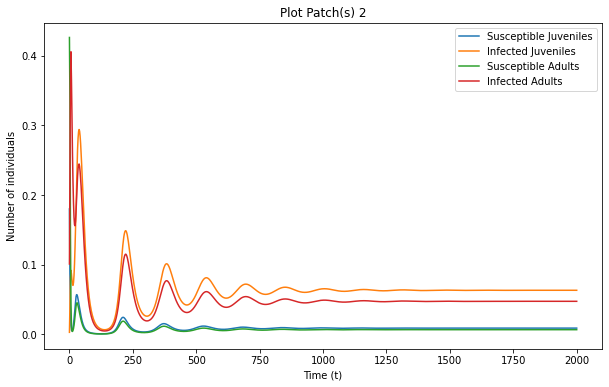

In [8]:
r = 1
k = 1
alpha = 0.6
mu_S = 0.1
mu_I = 0.1
p = 0.5
t_max = 2000

beta_1 = 0.3
beta_2 = 0.8

# JS1, JI1, AS1, AI1
# JS2, JI2, AS2, AI2

x00 = [0.00152, 0.00061, 0.00349, 0.00023,
       0.180, 0.003, 0.426, 0.101]

stability_condition =  beta_1 < mu_I # DFE is stable

new_pycno = PycnoSIX(mu_I, mu_S, alpha, beta_1, beta_2, k, p, r, x00, t_max)
new_pycno.solve_odes_system_odeint()
I_eq_obtained = new_pycno.Ji1[-1] + new_pycno.Ai1[-1]

lambda_1 = alpha/(beta_1 - mu_I + mu_S)
R_beta_1 = beta_1/(beta_1 - mu_I)
I_eq_theoretical = k*(R_beta_1*(p*r*lambda_1 - alpha - mu_S) - beta_1)/(p*r*lambda_1*(R_beta_1)**2)

R_p = p/mu_I
R_alpha = alpha/mu_I
R_s = mu_S/mu_I
R_0 = beta_1/mu_I

root_1 = 1 - R_s + (R_alpha/2)*(-1 - np.sqrt(1+ 4*r*R_p/R_alpha)) 
root_2 = 1 - R_s + (R_alpha/2)*(-1 + np.sqrt(1+ 4*r*R_p/R_alpha)) 

print(f'root 1: {root_1}, root 2: {root_2}')

I_1_theoretical = ((k*(R_0-1))/(r*R_p*R_alpha*R_0))*(r*R_p*R_alpha - (R_0 + R_s + R_alpha -1)*(R_0 + R_s -1))

JS = (1/(lambda_1+1))*(R_beta_1 - 1)*I_eq_theoretical
JI = (1/(lambda_1+1))*I_eq_theoretical
AS = (lambda_1/(lambda_1+1))*(R_beta_1 - 1)*I_eq_theoretical
AI = (lambda_1/(lambda_1+1))*I_eq_theoretical

eigs = get_eig_max(p, r, k, beta_1, alpha, mu_S, mu_I, JS, JI, AS, AI)

print(f"""
x00 = {x00}
p = {p}
R_0_1 = {beta_1/mu_I}
R_0_2 = {beta_2/mu_I}
I_eq_theoretical = {I_eq_theoretical} ({I_1_theoretical})
I_eq_real = {I_eq_obtained}
stability_condition of DFE: = {stability_condition}
Stability Condition of EE: {max(eigs) < 0}.
susceptible adults at eq patch 1 = {new_pycno.As1[-1]}
final infected second patch = {new_pycno.Ji2[-1] + new_pycno.Ai2[-1]}
""")
new_pycno.plot_ode_solution()
print('--------')
new_pycno.plot_ode_solution(patch=2)

C:\Users\jimmy\AppData\Local\Temp/ipykernel_4380/1625303430.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  R_beta_1 = beta_1/(beta_1 - mu_I)


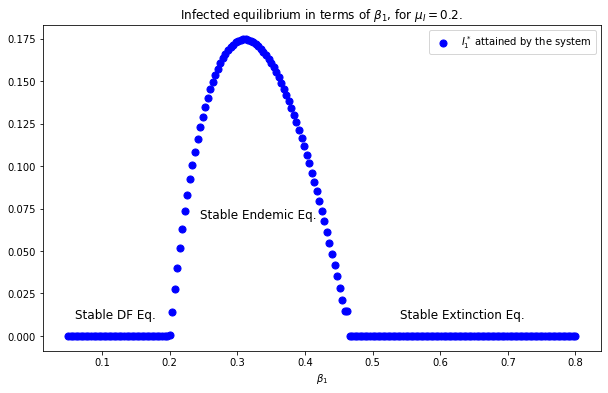

In [102]:
r = 1
k = 1
beta_2 = 0.8
alpha = 1
mu_S = 0.1
mu_I = 0.2
t_max = 2000
p = 0.5

# JS1, JI1, AS1, AI1
# JS2, JI2, AS2, AI2

I_eq_obtaineds = []
S_eq_obtaineds = []
beta_1s = []

for beta_1 in np.linspace(0.05, 0.8, 201):
    # print(beta_1)
    try:
        x00 = [0.00152, 0.00061, 0.00349, 0.00023,
               0.180, 0.003, 0.426, 0.101]
        lambda_1 = alpha/(beta_1 - mu_I + mu_S)
        R_beta_1 = beta_1/(beta_1 - mu_I)
        stability_condition =  ((mu_I)/(2*beta_1))*(1 + (alpha)/(mu_S)) > 1 # DFE is stable

        new_pycno = PycnoSIX(mu_I, mu_S, alpha, beta_1, beta_2, k, p, r, x00, t_max)
        new_pycno.solve_odes_system_odeint()
        I_eq_obtained = new_pycno.Ji1[-1] + new_pycno.Ai1[-1]
        S_eq_obtained = new_pycno.Js1[-1] + new_pycno.As1[-1]
        I_eq_obtaineds.append(I_eq_obtained)
        S_eq_obtaineds.append(S_eq_obtained)
        beta_1s.append(beta_1)
    except:
        pass
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(beta_1s, I_eq_obtaineds, s=50, c='b', label=r'$I_1^*$ attained by the system')
# ax1.scatter(beta_1s, S_eq_obtaineds, s=30, c='g', label=r'$S_1^*$ attained by the system')

ax1.annotate('Stable DF Eq.',
            xy=(75, 75), xycoords='figure points',
            fontsize=12)

ax1.annotate('Stable Endemic Eq.',
            xy=(200, 175), xycoords='figure points',
            fontsize=12)

ax1.annotate('Stable Extinction Eq.',
            xy=(400, 75), xycoords='figure points',
            fontsize=12)

plt.legend(loc='upper right')
plt.xlabel(r"$\beta_1$")
plt.title(r"Infected equilibrium in terms of $\beta_1$, for $\mu_I =" + str(mu_I) + "$.")
plt.show()

C:\Users\jimmy\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


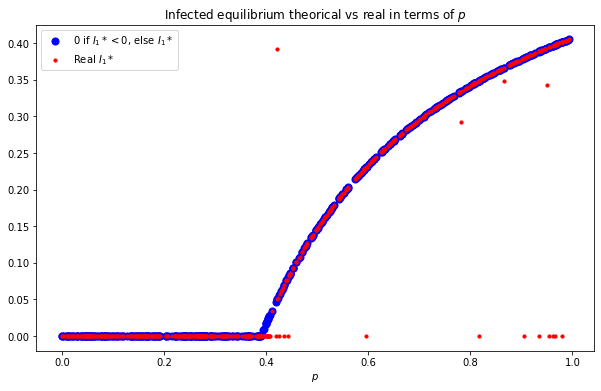

In [44]:
# Using random initial conditions.
sim_figure(r, k, beta_1, beta_2, alpha, mu_S, mu_I, t_max=5000, num_sim=500, sum_to_one=False)

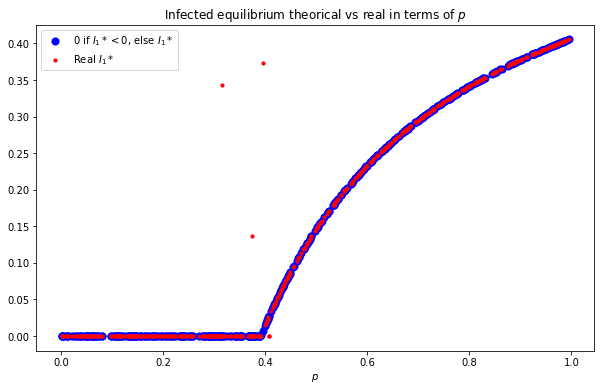

In [45]:
# Using random initial conditions that sum to one.
sim_figure(r, k, beta_1, beta_2, alpha, mu_S, mu_I, t_max=5000, num_sim=500, sum_to_one=True)

C:\Users\jimmy\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


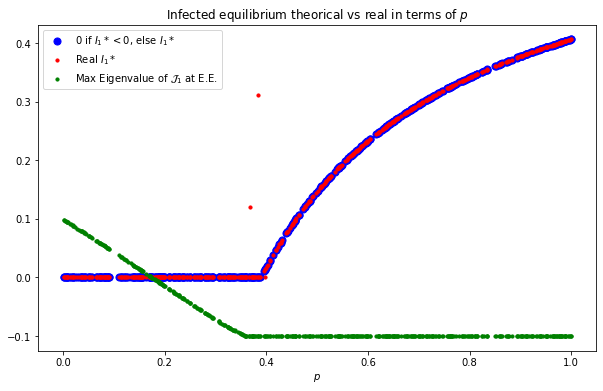

In [46]:
# Using random initial conditions that sum to one + max eigenvalue of jacobian
sim_figure(r, k, beta_1, beta_2, alpha, mu_S, mu_I, t_max=5000, num_sim=500, sum_to_one=True, add_eigvals=True)

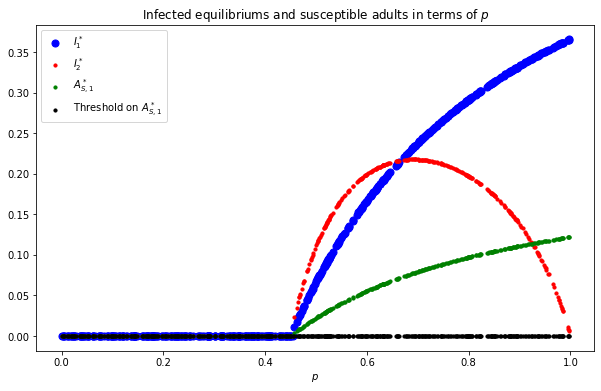

In [11]:
p_, I_eq_patch1_, I_eq_patch2_ = sim_figure_patch12(r, k, beta_1, beta_2, alpha, mu_S, mu_I, t_max=5000, num_sim=500, sum_to_one=True)

In [22]:
# print(f"""
# pp = {{ {','.join([str(round(x,4)) for x in p_])} }}; \n
# inf1 = {{ {','.join([str(round(x,4)) for x in I_eq_patch1_])} }}; \n
# inf2 = {{ {','.join([str(round(x,4)) for x in  I_eq_patch2_])} }};
# """)
print(f"r={r}, k={k}, \\beta_1={beta_1}, \\beta_2={beta_2}, \\alpha= {alpha}, \\mu_S={mu_S}, \\mu_I={mu_I}")

r=1, k=1, \beta_1=0.3, \beta_2=0.8, \alpha= 0.6, \mu_S=0.1, \mu_I=0.1


### Code:

In [3]:
def get_equilibrium(r, k, beta_1, beta_2, alpha, mu_S, mu_I, t_max, **kwargs):
    
    sum_to_one = kwargs.get('sum_to_one', True)
    p = random.uniform(0, 1)
    
    if sum_to_one:
        x00 = list(np.random.dirichlet(np.ones(8),size=1)[0])
    else:
        x00 = list(np.random.rand(4)) + list(np.random.rand(4))

    lambda_1 = alpha/(beta_1 - mu_I + mu_S)
    R_beta_1 = beta_1/(beta_1 - mu_I)
    I_eq_theoretical = k*(R_beta_1*(p*r*lambda_1 - alpha - mu_S) - beta_1)/(p*r*lambda_1*(R_beta_1)**2)
    
    new_pycno = PycnoSIX(mu_I, mu_S, alpha, beta_1, beta_2, k, p, r, x00, t_max)
    new_pycno.solve_odes_system_odeint()
    
    I_eq_obtained = new_pycno.Ji1[-1] + new_pycno.Ai1[-1]
    
    
    # Eigevals
    JS = (1/(lambda_1+1))*(R_beta_1 - 1)*I_eq_theoretical
    JI = (1/(lambda_1+1))*I_eq_theoretical
    AS = (lambda_1/(lambda_1+1))*(R_beta_1 - 1)*I_eq_theoretical
    AI = (lambda_1/(lambda_1+1))*I_eq_theoretical
    eigs = get_eig_max(p, r, k, beta_1, alpha, mu_S, mu_I, JS, JI, AS, AI)

    return p, x00, I_eq_theoretical, I_eq_obtained, max(eigs), new_pycno

In [4]:
def sim_figure(r, k, beta_1, beta_2, alpha, mu_S, mu_I, t_max, num_sim, **kwargs):
    I_eq_theoretical_, I_eq_obtained_, p_, max_eig_ = [], [], [], []
    for _ in range(num_sim):
        p, x00, I_eq_theoretical, I_eq_obtained, max_eig, new_pycno = get_equilibrium(r, k, 
                                                                                      beta_1, beta_2, 
                                                                                      alpha, 
                                                                                      mu_S, mu_I, 
                                                                                      t_max, **kwargs)
        p_.append(p)
        I_eq_obtained_.append(I_eq_obtained)
        max_eig_.append(max_eig)
        I_eq_theoretical_.append(max([I_eq_theoretical, 0]))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(p_, I_eq_theoretical_, s=50, c='b', label=r'0 if $I_1*<0$, else $I_1*$')
    ax1.scatter(p_, I_eq_obtained_, s=10, c='r', label=r'Real $I_1*$')
    
    add_eigvals = kwargs.get('add_eigvals', False)
    if add_eigvals:
        ax1.scatter(p_, max_eig_, s=10, c='g', label=r'Max Eigenvalue of $\mathcal{J}_1$ at E.E.')

    plt.legend(loc='upper left')
    plt.xlabel(r"$p$")
    plt.title(r"Infected equilibrium theorical vs real in terms of $p$")
    plt.show()

In [10]:
def sim_figure_patch12(r, k, beta_1, beta_2, alpha, mu_S, mu_I, t_max, num_sim, **kwargs):
    I_eq_patch1_, I_eq_patch2_, As_patch1_, p_, threshold_ = [],[],[],[],[]
    
    lambda_2 = alpha/(beta_2 - mu_I + mu_S)
    R_beta_2 = beta_2/(beta_2 - mu_I)
    
    
    for _ in range(num_sim):

        sum_to_one = kwargs.get('sum_to_one', True)
        p = random.uniform(0, 1)
        
        thresh = (k*(R_beta_2-1))/((1-p)*r*R_beta_2*(lambda_2+1))*(p*r*lambda_2 - ((beta_2)/(R_beta_2) + alpha + mu_S))

        if sum_to_one:
            x00 = list(np.random.dirichlet(np.ones(8),size=1)[0])
        else:
            x00 = list(np.random.rand(4)) + list(np.random.rand(4))
            
        new_pycno = PycnoSIX(mu_I, mu_S, alpha, beta_1, beta_2, k, p, r, x00, t_max)
        new_pycno.solve_odes_system_odeint()
        
        p_.append(p)
        I_eq_patch1_.append(new_pycno.Ji1[-1] + new_pycno.Ai1[-1])
        I_eq_patch2_.append(new_pycno.Ji2[-1] + new_pycno.Ai2[-1])
        As_patch1_.append(new_pycno.As1[-1])
        if thresh < -0.1:
            threshold_.append(0)
        else:
            threshold_.append(thresh)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(p_, I_eq_patch1_, s=50, c='b', label=r'$I_1^*$')
    ax1.scatter(p_, I_eq_patch2_, s=10, c='r', label=r'$I_2^*$')
    ax1.scatter(p_, As_patch1_, s=10, c='g', label=r'$A_{S,1}^*$')
    ax1.scatter(p_, threshold_, s=10, c='k', label=r'Threshold on $A_{S,1}^*$')

    plt.legend(loc='upper left')
    plt.xlabel(r"$p$")
    plt.title(r"Infected equilibriums and susceptible adults in terms of $p$")
    plt.show()
    
    return p_, I_eq_patch1_, I_eq_patch2_

In [6]:
def get_eig_max(p, r, k, beta, alpha, mu_S, mu_I, JS, JI, AS, AI):

    N = JS + JI + AS + AI
    delta = (JI+AI)/N
    eta = (JI+AI)/(N**2)
    vartheta = (JS+AS)/(N**2)
    
    jacobian = np.array([
        
        [-1*(p*r*AS)/k + beta*delta + beta*JS*eta - (alpha + mu_S), 
         -1*(p*r*AS)/k - beta*JS*vartheta, 
         -2*(p*r*AS)/k + beta*JS*eta,
         -1*(p*r*AS)/k - beta*JS*vartheta],
        
        [beta*delta - beta*JS*eta,
         beta*JS*vartheta - mu_I,
         -1*beta*JS*eta,
         beta*JS*vartheta],
        
        [alpha + beta*AS*eta,
         -1*beta*AS*vartheta,
         -1*beta*delta + beta*AS*eta - mu_S,
         -1*beta*AS*vartheta
        ],
        
        [-1*beta*AS*eta,
         beta*AS*vartheta,
         beta*delta - beta*AS*eta,
         beta*AS*vartheta - mu_I]
    ])
    
    eigenvalues, _ = LA.eig(jacobian)
    
    return eigenvalues

In [7]:
class PycnoSIX():

    def __init__(self, mu_I, mu_S, alpha, beta_1, beta_2, k, p, r, x00, t_max, **kwargs):

        # Initial parameters
        self.mu_I = mu_I
        self.mu_S = mu_S
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.alpha = alpha
        self.k = k
        self.p = p
        self.r = r

        # Simulation parameters
        self.t_max = t_max
        self.x00 = x00

        # For odeint
        self.steps = kwargs.get('steps', 1000)

    def state_odes_system(self, x, t):

        JS1, JI1, AS1, AI1 = x[0], x[1], x[2], x[3]
        JS2, JI2, AS2, AI2 = x[4], x[5], x[6], x[7]
        
        N1 = JS1 + JI1 + AS1 + AI1
        N2 = JS2 + JI2 + AS2 + AI2
        du = [0]*8

        du[0] = self.p*self.r*(1-N1/self.k)*AS1-self.beta_1*JS1*(JI1+AI1)/N1-self.alpha*JS1-self.mu_S*JS1
        du[1] = self.beta_1*JS1*(JI1+AI1)/N1-self.mu_I*JI1
        du[2] = self.alpha*JS1-self.beta_1*AS1*(JI1+AI1)/N1-self.mu_S*AS1
        du[3] = self.beta_1*AS1*(JI1+AI1)/N1-self.mu_I*AI1

        du[4] = (1-self.p)*self.r*(1-N2/self.k)*AS1 + self.p*self.r*(1-N2/self.k)*AS2-self.beta_2*JS2*(JI2+AI2)/N2-self.alpha*JS2-self.mu_S*JS2
        du[5] = self.beta_2*JS2*(JI2+AI2)/N2-self.mu_I*JI2
        du[6] = self.alpha*JS2-self.beta_2*AS2*(JI2+AI2)/N2-self.mu_S*AS2
        du[7] = self.beta_2*AS2*(JI2+AI2)/N2-self.mu_I*AI2
    
        return [du[0], du[1], du[2], du[3], du[4], du[5], du[6], du[7]]

    def solve_odes_system_odeint(self):
        """
        Solve the classical system with initial conditions
        """
        t = np.linspace(0, 0 + self.t_max, self.steps)
        self.time = t
        x = odeint(func=self.state_odes_system,
                    y0=self.x00, t=t, full_output=True)

        self.Js1 = x[0][:, 0]
        self.Ji1 = x[0][:, 1]
        self.As1 = x[0][:, 2]
        self.Ai1 = x[0][:, 3]
        
        self.Js2 = x[0][:, 4]
        self.Ji2 = x[0][:, 5]
        self.As2 = x[0][:, 6]
        self.Ai2 = x[0][:, 7]

    def plot_ode_solution(self, **kwargs):
        
        patch = kwargs.get('patch', 1)
        title = kwargs.get('title', f'Plot Patch(s) {patch}')
        
        if patch == 1:

            plt.plot(self.time, self.Js1, label="Susceptible Juveniles")
            plt.plot(self.time, self.Ji1, label="Infected Juveniles")
            plt.plot(self.time, self.As1, label="Susceptible Adults")
            plt.plot(self.time, self.Ai1, label="Infected Adults")
            
        elif patch == 2:
            
            plt.plot(self.time, self.Js2, label="Susceptible Juveniles")
            plt.plot(self.time, self.Ji2, label="Infected Juveniles")
            plt.plot(self.time, self.As2, label="Susceptible Adults")
            plt.plot(self.time, self.Ai2, label="Infected Adults")
            
        else:
            plt.plot(self.time, self.Js1, label="Susceptible Juveniles")
            plt.plot(self.time, self.Ji1, label="Infected Juveniles")
            plt.plot(self.time, self.As1, label="Susceptible Adults")
            plt.plot(self.time, self.Ai1, label="Infected Adults")
            plt.plot(self.time, self.Js2, label="Susceptible Juveniles")
            plt.plot(self.time, self.Ji2, label="Infected Juveniles")
            plt.plot(self.time, self.As2, label="Susceptible Adults")
            plt.plot(self.time, self.Ai2, label="Infected Adults")

        plt.title(title)
        plt.xlabel("Time (t)")
        plt.ylabel("Number of individuals")
        plt.legend(loc="upper right")
        plt.rcParams["figure.figsize"] = (10, 6)
        plt.show()